In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
print("Setup Complete")
sns.set_palette("muted")
pd.plotting.register_matplotlib_converters()

sns.set(rc={'figure.figsize':(14,10)})

Setup Complete


In [2]:
# Загрузка данных
titanic_filepath = "../train.csv"
titanic_data = pd.read_csv(titanic_filepath, index_col="PassengerId")


# Описание

### Основная информация
«Титаник» (англ. Titanic) — британский трансатлантический пароход, крупнейшее пассажирское судно в мировой истории в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года.

Каюты и общественные помещения «Титаника» разделялись на три класса.
«Титаник» отправился из Саутгемптона в Нью-Йорк, совершив остановки во французском Шербуре и ирландском Квинстауне.

### Словарь данных

|  Переменная | Определение  | Ключ  |
|:---|:---|:--|
| Survival  | Спасение | 0 - нет, 1 - да |
| Pclass    | Класс билета  | 1 - первый, 2 - второй, 3 - третий  |
| Sex | Пол | male - мужчина, female - женщина |
| Age | Возраст в годах |  |
| Sibsp | Супруг, братья и сестеры на борту корабля (в сумме) |  |
| Parch | Родители и дети на борту корабля (в сумме) |  |
| Ticket | Номер билета ||
| Fare | Стоимость билета ||
| Cabin | Номер кабины ||
| Embarked | Порт погрузки | C - Шербур, Q - Квинстаун, S - Саутгемптон|


# Оценка качества данных
Дублирующие записи и пропуски искажают статистические показатели датасета. Уточним, сколько записей в датасете, удалим дублирующие записи и обновим данные о размере данных:

In [3]:
print(titanic_data.shape)
titanic_data.drop_duplicates()
print(titanic_data.shape)

(100000, 11)
(100000, 11)


Размера датасета не изменился, следовательно, все записи нем уникальны. 

Проверим тип данных и количество записей для каждого признака в датасете:

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Все типы данных признаков соответсвуют их описанию. 

В датасете присутствуют пропуски, рассчитаем в процетах насколько заполнен каждый признак:

In [5]:
titanic_data.isnull().mean() * 100 # Концентрация пропусков в процентах

Survived     0.000
Pclass       0.000
Name         0.000
Sex          0.000
Age          3.292
SibSp        0.000
Parch        0.000
Ticket       4.623
Fare         0.134
Cabin       67.866
Embarked     0.250
dtype: float64

Среди всех признаков слишком много пропусков оказалось в переменной "Cabin" - почти 68%. Еще 4 признака имеют незначительное количество пропусков: Ticket - 4.6%, "Age" - 3.3%, Embarked - 0.3%, Fare - 0.1%.

Посмотрим как выглядит общая описательная статистика для датасета:

In [6]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Числовые описательные характеристики не имеют противоречий с определением признаков. Однако, признак "Pclass" следует отнести к категориальным признакам.
Отдельно рассмотрим общие характеристики для категориальных признаков:

In [7]:
titanic_data.loc[titanic_data.Survived == 0, 'Survived'] = 'No' #  Перевод числовых значений 'Survived'
titanic_data.loc[titanic_data.Survived == 1, 'Survived'] = 'Yes'#  в "да"/"нет"
# Перевод числовых значений 'Pclass'
titanic_data.loc[:, 'Pclass'] = titanic_data.Pclass.replace(1, '1st').replace(2, '2nd').replace(3, '3rd')

categorical = titanic_data.loc[:, ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
numerical = titanic_data.loc[:, [ 'Age', 'SibSp', 'Parch', 'Fare']]
categorical.describe()

,Survived,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,100000,100000,100000,100000,95377,32134,99750
unique,2,3,92144,2,75331,26992,3
top,No,3rd,"Johnson, John",male,A/5,C19828,S
freq,57226,41006,31,56114,602,6,72139


In [8]:
# Вывод уникальных значений категориальных переменных
for i in categorical:
    print(f"{i}:\t{categorical[i].unique()}\n".expandtabs(20))

Survived:           ['Yes' 'No']

Pclass:             ['1st' '3rd' '2nd']

Name:               ['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler']

Sex:                ['male' 'female']

Ticket:             ['209245' '27323' 'CA 457703' ... 'PC 15008' '458654' '458074']

Cabin:              ['C12239' nan 'A7253' ... 'D12975' 'F12072' 'D17243']

Embarked:           ['S' 'C' 'Q' nan]



Категориальные описательные характеристики так же не имеют противоречий с определением признаков.

# Исследование
Для начала рассмотрим признаки с пропусками и постараемся их полностью заменить.

### Cabin 
Так как признак "Cabin" имеет очень много пропусков (68%), они не могут быть заменены корректно. Исследование значений этого признака не даст много информации. Попробуем проследить за зависимостью выживания от наличия номера кабины:

<AxesSubplot:xlabel='Cabin_group', ylabel='count'>

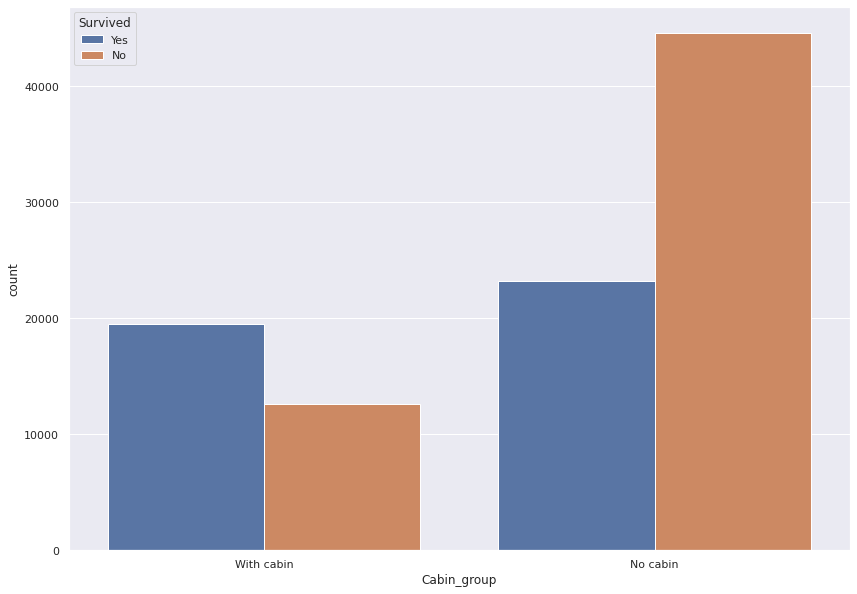

In [9]:
titanic_data['Cabin_group'] = 'With cabin'
titanic_data.loc[titanic_data.Cabin.isna(), 'Cabin_group'] = 'No cabin'
sns.countplot(x = 'Cabin_group', hue = 'Survived', data = titanic_data)

На выживание положительно влияет наличие кабины, и при ее отсутсвии вероятность выжить падает до 1/3. Рассмотрим влияние наличие кабины совместно с "Pclass":

<AxesSubplot:>

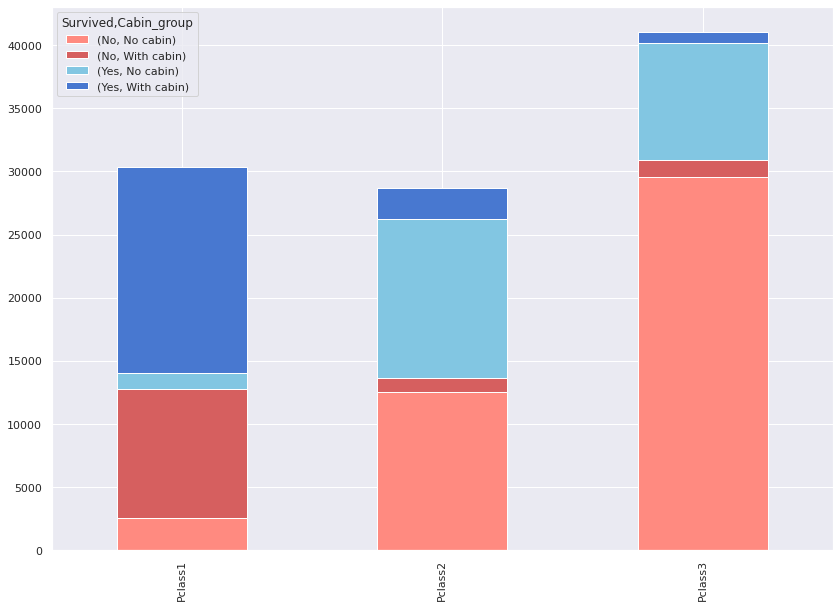

In [10]:
df = pd.DataFrame()
df['Pclass1'] = titanic_data[titanic_data.Pclass == '1st'].loc[:, ['Cabin_group', 'Pclass', 'Survived']].groupby(['Survived', 'Cabin_group']).count()
df['Pclass2'] = titanic_data[titanic_data.Pclass == '2nd'].loc[:, ['Cabin_group', 'Pclass', 'Survived']].groupby(['Survived', 'Cabin_group']).count()
df['Pclass3'] = titanic_data[titanic_data.Pclass == '3rd'].loc[:, ['Cabin_group', 'Pclass', 'Survived']].groupby(['Survived', 'Cabin_group']).count()
df.T.plot(kind='bar', stacked=True, color=['#FF8A80', '#D65F5F', '#82C6E2', '#4878D0'], figsize=(14,10))

Некоторые выводы можно сделать по графику:

<b>Для первого класса.</b> Подавляющее большинство пассажиров с номером кабины являются обладателями билета первого класса. Более половины от этого количества людей  - выжившие. 

<b>Для второго класса</b>. Количество выживших пассажиров с номерами кабин более чем в 2 раза больше погибших пассажиров с номерами кабин. Для пассажиров без номеров это соотношение практически равно 1:1.

<b>Для третьего класса</b>. Количество погибших в разы преобладает над выжившими как для пассажиров с номерами кабин.

### Ticket
Можно предположить, что буквы в номере билета связаны с портом посадки пассажиров. Отфильтруем билеты, состоящие только из цифр, и рассмотрим статистику по порту:

In [11]:
import numpy as np
new_data = titanic_data
new_data['Ticket_letter'] = titanic_data.Ticket
new_data.Ticket_letter = new_data.Ticket_letter.str.replace('[^a-zA-Z]+', '')
new_data['Ticket_letter'].replace('', np.nan, inplace=True)
embarked_data = new_data[new_data.Ticket_letter.notna()].groupby('Ticket_letter').Embarked
embarked_data.describe()

/tmp/ipykernel_33142/1538895439.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  new_data.Ticket_letter = new_data.Ticket_letter.str.replace('[^a-zA-Z]+', '')


,count,unique,top,freq
Ticket_letter,,,,
A,6077,3,S,5233
AQ,102,3,S,78
AS,44,3,S,22
C,220,3,S,185
CA,2438,3,S,2034
CASOTON,36,3,S,30
FC,295,3,S,163
FCC,575,3,S,463
Fa,53,3,S,47


Как видно, билеты с буквенными значения не зависят от порта посадки. Посмотрим на отношение выживших и не выживших пассажиров к этим билетам.

<AxesSubplot:xlabel='Ticket_letter'>

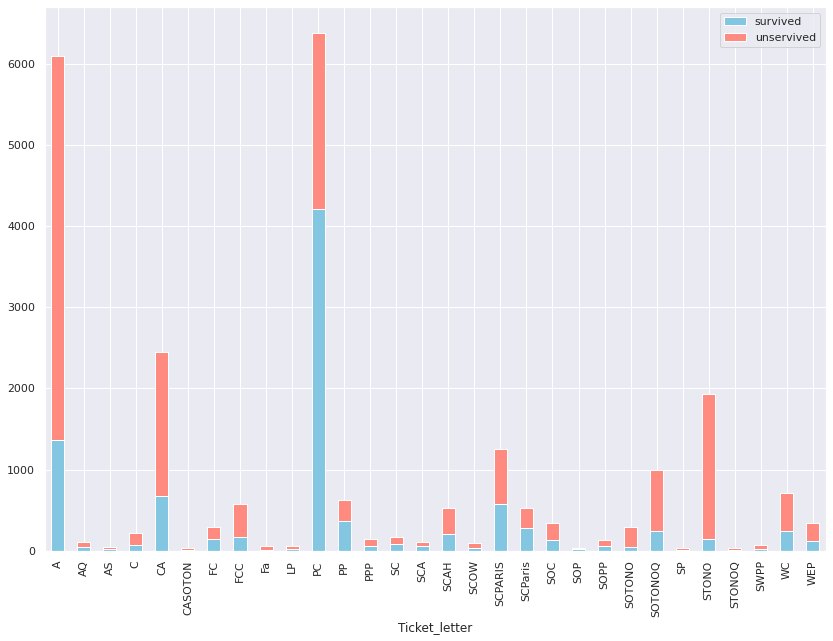

In [12]:
ticket_surv = new_data[new_data.Ticket_letter.notna()].loc[:, ['Survived','Ticket_letter']].groupby('Ticket_letter')#.size()
survi = []
unsurvi = []
for i in ticket_surv:
    survi.append(i[1].groupby('Survived').size()[1])
    unsurvi.append(i[1].groupby('Survived').size()[0])
    
surv_dict = {'survived' : survi, 'unservived': unsurvi}

pdmem = pd.DataFrame.from_dict(surv_dict, columns=ticket_surv.size().index, orient='index')

pdmem.T.plot(kind='bar', stacked=True, color=['#82C6E2', '#FF8A80'], figsize=(14,10))


Подавляющее большинство буквенными значениями "A" и "STONO" в билетах погибших пассажиров, и в два раза количество выживших пассажиров преобладает над погибшими с билетами "PC". Для удобного масштаба уберем наибольшие значения.

<AxesSubplot:xlabel='Ticket_letter'>

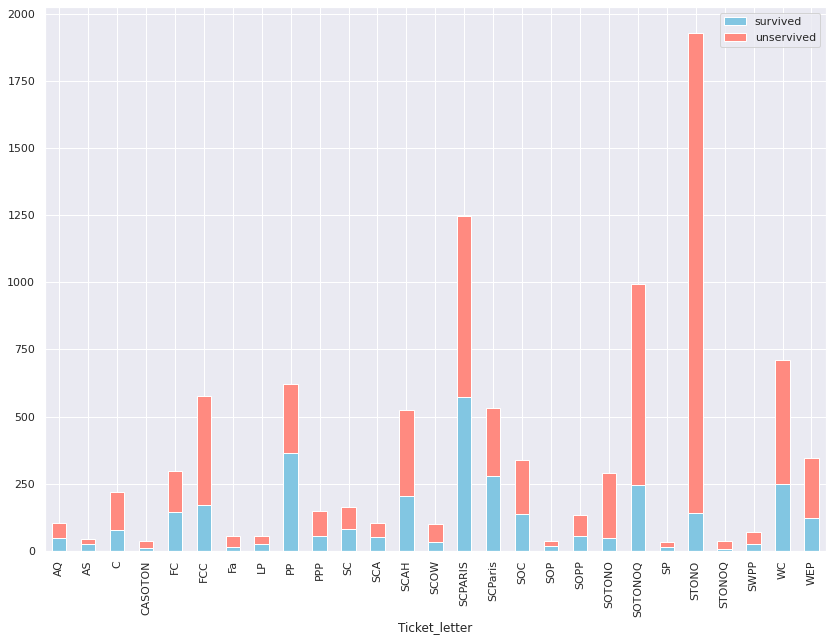

In [13]:
newpd = pdmem.drop(['A', 'PC', 'CA'], axis=1)
newpd.T.plot(kind='bar', stacked=True, color=['#82C6E2', '#FF8A80'], figsize=(14,10))

Очень мал процент выживших пассажиров с билетами "STONO", "STONOQ", "STOONO", "SOTONOQ". Так как наименования отличаются парой символов, можно предположить, что они относятся к одной группе.

### Age

Процент пропусков возрастов не велик, поэтому заменим его средним значением в "Pclass" и "Sex".

In [14]:
age_mean = titanic_data.groupby(['Pclass', 'Sex']).Age.mean()
age_mean

Pclass  Sex   
1st     female    46.995091
        male      42.254922
2nd     female    39.324223
        male      37.839926
3rd     female    31.973681
        male      34.038757
Name: Age, dtype: float64

In [15]:
age_mean = titanic_data.groupby(['Pclass', 'Sex']).Age.mean()

for i in titanic_data[titanic_data.Age.isna()].index:
    iclass = titanic_data.iloc[i].Pclass
    isex = titanic_data.iloc[i].Sex
    titanic_data.loc[i,'Age'] = age_mean.loc[iclass][isex]
titanic_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_group,Ticket_letter
PassengerId,,,,,,,,,,,,,
0,Yes,1st,"Oconnor, Frankie",male,42.254922,2,0,209245,27.14,C12239,S,With cabin,NaN
1,No,3rd,"Bryan, Drew",male,34.038757,0,0,27323,13.35,NaN,S,No cabin,NaN
2,No,3rd,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,NaN,S,No cabin,CA
3,No,3rd,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,NaN,S,No cabin,A
4,Yes,3rd,"Bond, Michael",male,25.000000,0,0,427635,7.76,NaN,S,No cabin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Yes,2nd,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,D17243,C,With cabin,PC
99996,No,2nd,"Brown, Herman",male,66.000000,0,0,13273,11.15,NaN,S,No cabin,NaN
99997,No,3rd,"Childress, Charles",male,37.000000,0,0,NaN,9.95,NaN,S,No cabin,NaN


/home/tom/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/tom/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


<AxesSubplot:xlabel='Age'>

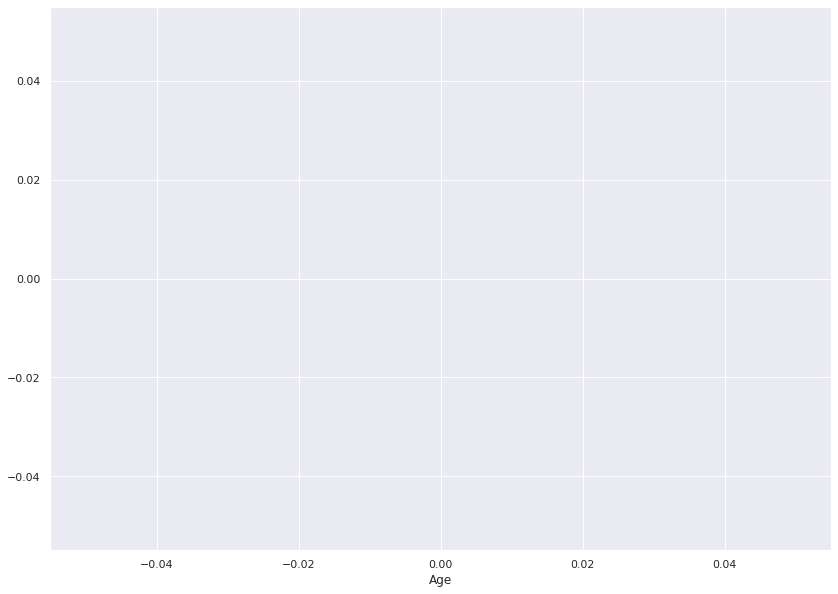

In [25]:
age_data = titanic_data.Age.astype(int, errors='ignore')

age_data.value_counts()
sns.lineplot(age_data)# titanic_data.Age.hist(bins=87, figsize=(20, 10))

График имеет скачки, так как пременная "Age" является числом с плавающей точкой(Float) и в основном в датасете возраст пассажиров округлен до целого числа.

In [17]:
#sns.pairplot(titanic_data, hue="Survived")

# Summary